In [69]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [253]:
import cv2 
import matplotlib.pyplot as plt

In [254]:
image = cv2.imread("C:/Users/shrut/Downloads/portrait-of-a-young-adult-asian-woman-in-venice.webp") 
image = cv2.resize(image, (720, 640))

In [255]:
f1="C:/Users/shrut/Downloads/Age-Gender-Detection-20231122T132452Z-001/Age-Gender-Detection/opencv_face_detector.pbtxt"
f2="C:/Users/shrut/Downloads/Age-Gender-Detection-20231122T132452Z-001/Age-Gender-Detection/opencv_face_detector_uint8.pb"
age1 = "C:/Users/shrut/Downloads/Age-Gender-Detection-20231122T132452Z-001/Age-Gender-Detection/age_deploy.prototxt"
age2 = "C:/Users/shrut/Downloads/Age-Gender-Detection-20231122T132452Z-001/Age-Gender-Detection/age_net.caffemodel"
gen1 = "C:/Users/shrut/Downloads/Age-Gender-Detection-20231122T132452Z-001/Age-Gender-Detection/gender_deploy.prototxt"
gen2 = "C:/Users/shrut/Downloads/Age-Gender-Detection-20231122T132452Z-001/Age-Gender-Detection/gender_net.caffemodel"

values= (78.4263377603, 87.7689143744, 114.895847746) 

In [256]:
face = cv2.dnn.readNet(f2, f1)  
age = cv2.dnn.readNet(age2, age1)  
gen = cv2.dnn.readNet(gen2, gen1) 

In [257]:
sa= ['(25-32)', '(38-43)','(48-53)','(60-100)','(0-2)', '(4-6)', '(8-12)', '(15-20)'] 
sg= ['Male', 'Female']

In [258]:
fr_cv = image.copy()

In [259]:
ng= fr_cv.shape[0] 
np= fr_cv.shape[1] 
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300), [104, 117, 123], True, False) 
face.setInput(blob) 
detections=face.forward()

In [260]:
faceBoxes = [] 
for i in range(detections.shape[2]):
    predict = detections[0, 0, i, 2] 
    if predict > 0.7: 
        x1 = int(detections[0, 0, i, 3]*ng)
        y1 = int(detections[0, 0, i, 4]*np) 
        x2 = int(detections[0, 0, i, 5]*ng) 
        y2 = int(detections[0, 0, i, 6]*np) 
        faceBoxes.append([x1, y1, x2, y2]) 
        
        cv2.rectangle(fr_cv, (x1, y1), (x2, y2),(0, 255, 0), int(round(fr_h/150)), 8) 
faceBoxes

[[262, 108, 387, 387]]

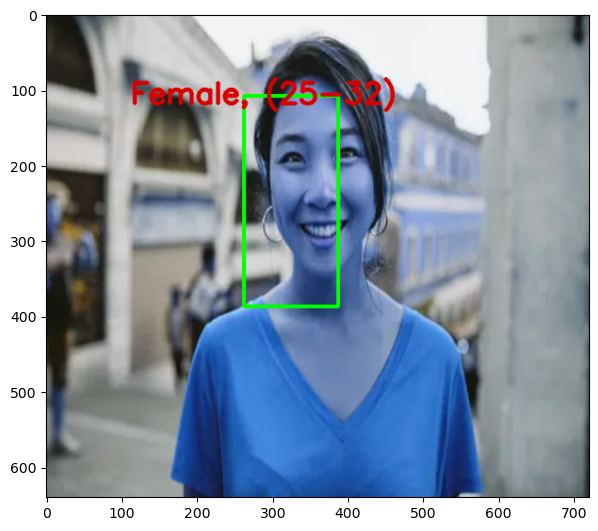

In [261]:
for faceBox in faceBoxes: 
    face = fr_cv[max(0, faceBox[1]-15): 
                min(faceBox[3]+15, fr_cv.shape[0]-1), 
                max(0, faceBox[0]-15):min(faceBox[2]+15, 
                            fr_cv.shape[1]-1)] 
    blob = cv2.dnn.blobFromImage( 
        face, 1.0, (227, 227),values, swapRB=False) 

    #Gender predictions
    gen.setInput(blob) 
    genderPre= gen.forward() 
    gender = sg[genderPre[0].argmax()] 

    #Age prediction
    age.setInput(blob) 
    agePre= age.forward() 
    age = sa[agePre[0].argmax()]

    cv2.putText(fr_cv, 
                f'{gender}, {age}', 
                (faceBox[0]-150, faceBox[1]+10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                1.3, 
                (217, 0, 0), 
                4, 
                cv2.LINE_AA) 

    plt.figure(figsize=(7, 7)) 
    plt.imshow(fr_cv)
if not faceBoxes: 
    print("No face detected") 